1. Bild laden und verrauschen

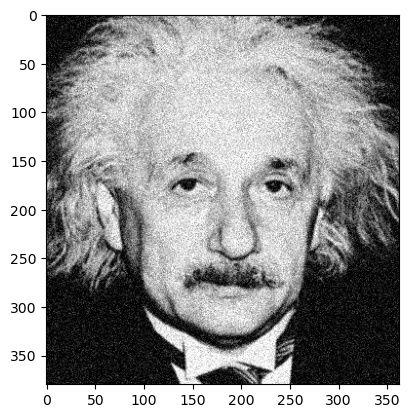

In [39]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.filters import *
import numpy as np
from skimage.util import random_noise
from scipy.ndimage import uniform_filter
from skimage.filters import gaussian


img = imread('einstein.png')
img
img = img.astype(np.float32)/255
#plt.imshow(img, cmap='gray', vmin=0, vmax=1)
img_gr = random_noise(img, mode ='gaussian',var=0.01)
plt.imshow(img_gr, cmap='gray', vmin=0, vmax=1)

2. Funktion mittleren absoluten unterschied bestimmen

In [31]:
def unterschied (img, img_gr):
    diff_abs = np.abs(img- img_gr)
    diff_sum = np.sum(diff_abs)
    pixel = img.size
    mean_diff = diff_sum /pixel
    return mean_diff

result = unterschied(img, img_gr)
print (f'Der unterschied beträgt  {result}')

Der unterschied beträgt  0.07244199588831633


3. Box Filter anwenden und Differenz ermitteln

Der unterschied für n =3 beträgt  0.031057872465069046
Der unterschied für n =5 beträgt  0.0345826896640272
Der unterschied für n =7 beträgt  0.04131539414468114
Der unterschied für n =9 beträgt  0.04730669519054805
Der unterschied für n =11 beträgt  0.052575221202297344


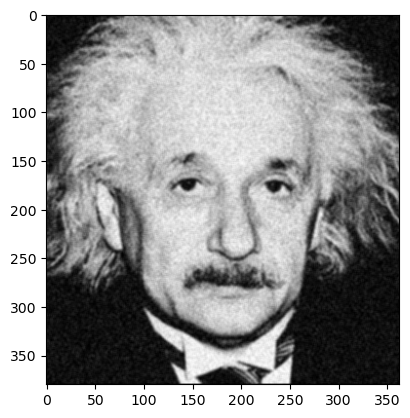

In [32]:
box3 = uniform_filter(img_gr, 3, mode='constant',cval=0.0)
box5 = uniform_filter(img_gr, 5, mode='constant',cval=0.0)
box7 = uniform_filter(img_gr, 7, mode='constant',cval=0.0)
box9 = uniform_filter(img_gr, 9, mode='constant',cval=0.0)
box11 = uniform_filter(img_gr, 11, mode='constant',cval=0.0)

result3 = unterschied(img, box3)
result5 = unterschied(img, box5)
result7 = unterschied(img, box7)
result9 = unterschied(img, box9)
result11 = unterschied(img, box11)
print (f'Der unterschied für n =3 beträgt  {result3}')
print (f'Der unterschied für n =5 beträgt  {result5}')
print (f'Der unterschied für n =7 beträgt  {result7}')
print (f'Der unterschied für n =9 beträgt  {result9}')
print (f'Der unterschied für n =11 beträgt  {result11}')

plt.imshow(box3, cmap='gray', vmin=0, vmax=1)

4. Gauß-Filter anwenden

Best sigma: 0.1
Mittlere Differenz: 0.0


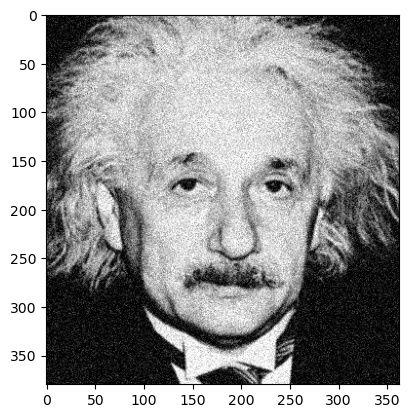

In [52]:
best_sigma = 0
best_diff = float('inf')
best_filtered_image = None

sigmas = [i / 10 for i in range(1, 21)] #damit wir im Bereich von 0,1 bis 2 bleiben

for sigma in sigmas:
    filtered_image = gaussian(img_gr, sigma=sigma)
    mean_diff = unterschied(img_gr, filtered_image)
    if mean_diff < best_diff:
        best_diff = mean_diff
        best_sigma = sigma
        best_filtered_image = filtered_image

print(f'Best sigma: {best_sigma}')
print(f'Mittlere Differenz: {best_diff}')

#bestes Sigma anzeigen

plt.imshow(best_filtered_image, cmap='gray')
plt.show()

5. Salt and Peper Noise

Best sigma: 0.1
Mittlere Differenz: 0.0


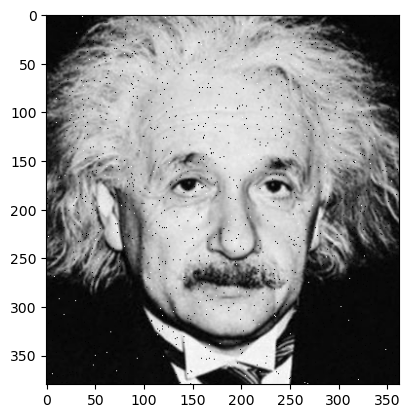

In [53]:
img_sp = random_noise(img, mode='s&p', amount=0.01, salt_vs_pepper=0.1)

best_sigma = 0
best_diff = float('inf')
best_filtered_image = None

sigmas = [i / 10 for i in range(1, 21)] #damit wir im Bereich von 0,1 bis 2 bleiben

for sigma in sigmas:
    filtered_image = gaussian(img_sp, sigma=sigma)
    mean_diff = unterschied(img_sp, filtered_image)
    if mean_diff < best_diff:
        best_diff = mean_diff
        best_sigma = sigma
        best_filtered_image = filtered_image

print(f'Best sigma: {best_sigma}')
print(f'Mittlere Differenz: {best_diff}')

#bestes Sigma anzeigen

plt.imshow(best_filtered_image, cmap='gray')
plt.show()


6. Median Filter

Der unterschied beträgt  0.010263826564652204


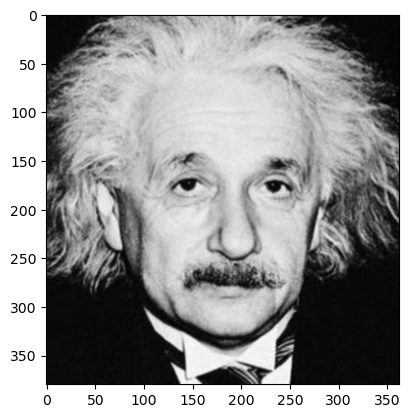

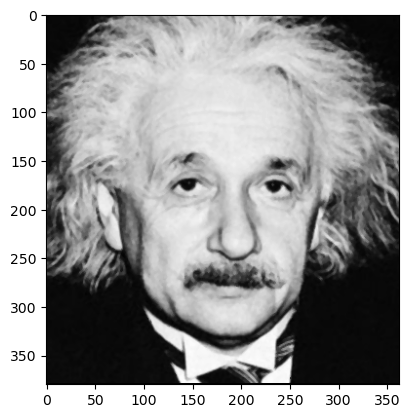

In [65]:
m,n = img_sp.shape
median_filter = np.zeros_like(img_sp)

for i in range(1,m-1):
    for j in range (1, n-1):
        nachbarn = img_sp[i-1:i+2, j-1:j+2]
        median_filter[i,j] = np.median(nachbarn)

result_median = unterschied (median_filter, img)
print (f'Der unterschied beträgt  {result_median}')

plt.imshow(img, cmap='gray')
plt.show()

plt.imshow(median_filter, cmap='gray')
plt.show()
